# Welcome to UETOOLS


Ensure that UEDGE is installed on your machine. If not, UEDGE can easily be installed using pip:

    pip install uedge

In [1]:
import uedge

#### Restoring a UEDGE case from an input file
Next, it is time to import the UEDGE case: first navigate to the test folder

In [2]:
from os import chdir
chdir('testcase_hires') 

Now, it is time to load the UETOOLS and create a case based on the input file

In [3]:
from uetools import Case
c = Case('input.yaml') # Create a test at variable "c" from the YAML input file

UEDGE configuration file /Users/holm10/.uetoolsrc found.
Saved solution successfully restored from nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 1.07e-02



UETOOLS reads YAML-style input files, or restores the UEDGE case from save-files created by UETOOLS. Whenever a UEDGE case is restored, UETOOLS evaluates the convergence without preconditioning to give a quick estimate of the status of the case. Here, the case is converged, as evident from the UETOOLS message.



#### Restoring a UEDGE case from a save file
Below is shown an example of a UEDGE case being restored from a save-file.

In [4]:
c = Case('nc20.hdf5')

UEDGE configuration file /Users/holm10/.uetoolsrc found.
Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from nc20.hdf5
  User-specified diffusivities read from HDF5 file
Saved solution successfully restored from nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 1.07e-02



As is evident from the above, restoring from a save-file is equivalent to restoring a save from an input file when using UETOOLS. Therefore, UEDGE cases can be transferred in a single file (barring any atomic and molecular rates, which are used when setting up the case).

### Basic plotting using UETOOLS
UETOOLS contains a wide array plotting tools for visualizing UEDGE results. Here, we will showcase some of the most central routines.

#### Plotting the grid
The grid function has a number of options that can be utilized to alter the style of the grid:

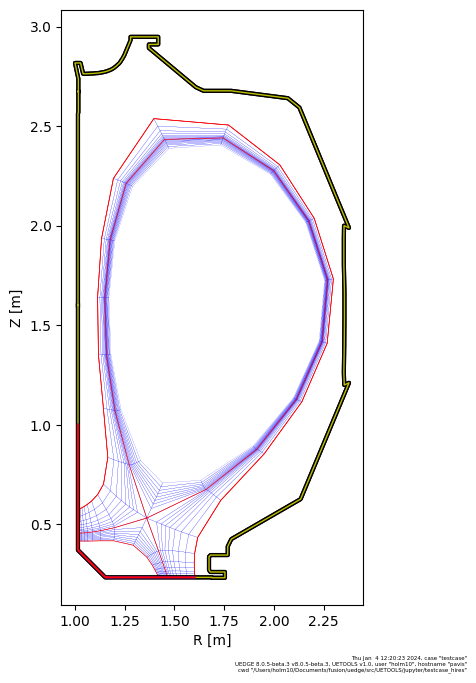

In [5]:
c.grid(linewidth=0.1, vessel=True, plates=True, platecolor=['gold','teal'], lcfs=True, lcfscolor='r', linecolor='b');

#### Plotting colored meshes
Meshplots have a number of controls, in addition to those available to the grid function. Let's start by plotting the electron density.

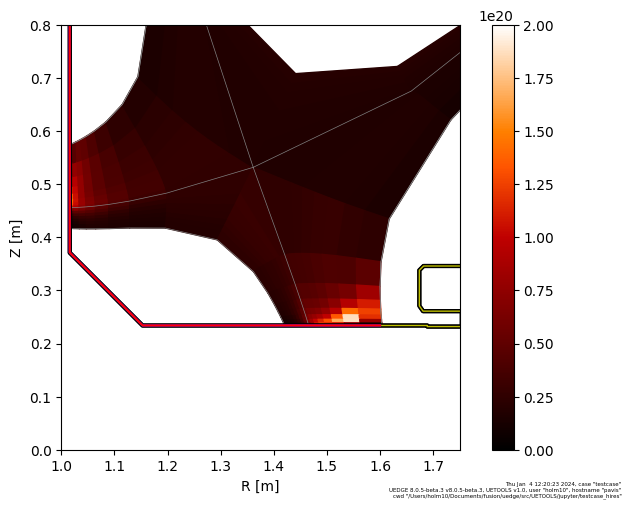

In [6]:
c.plotmesh(c.get('ne'), xlim=(1, 1.75), ylim=(0,0.8), figsize=(7,5), zrange=(0,2e20), cmap='gist_heat');

Here, the Case-method 'get' is used to retrieve the electron density data from variable 'ne' of the 'bbb' package. The get command is directly interchangeable with the variable, e.g. 'bbb.ne'.

The heatmap can also be plotted on a logartihmic axis:

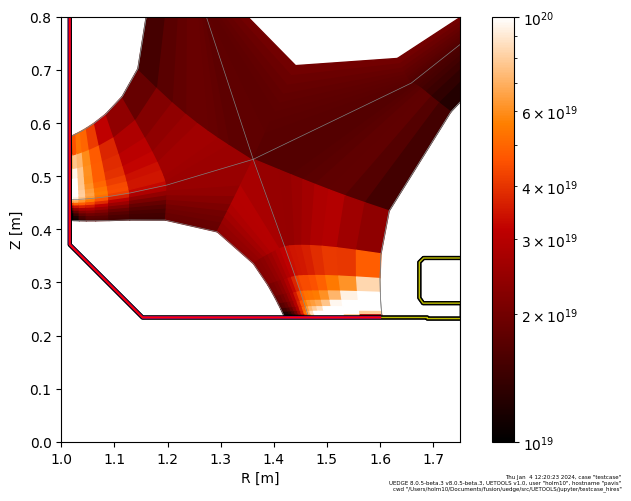

In [7]:
c.plotmesh(bbb.ne, log=True, xlim=(1, 1.75), ylim=(0,0.8), figsize=(7,5), zrange=(1e19,1e20), cmap='gist_heat');

When running an interactive session, the keyword 'interactive' can be used to interactively interact with the figure (not available in Jupyter notebooks).

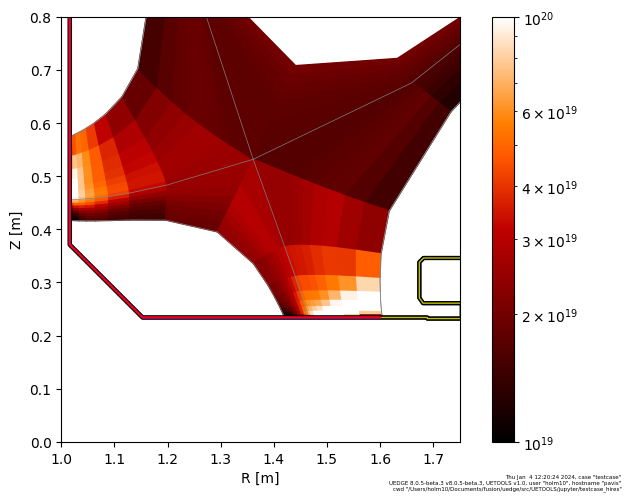

In [8]:
c.plotmesh(bbb.ne, interactive=True, log=True, xlim=(1, 1.75), ylim=(0,0.8), figsize=(7,5), zrange=(1e19,1e20), cmap='gist_heat');

UETOOLS makes a number of pre-defined mesh plots available to the user, where all plotmesh-options are available to the user:
- ne2D
- te2D
- ni2D
- ti2D
- ng2D
- tg2D

#### Contour plots
Here is shown an examples of plotting a contour of the electron temperature:

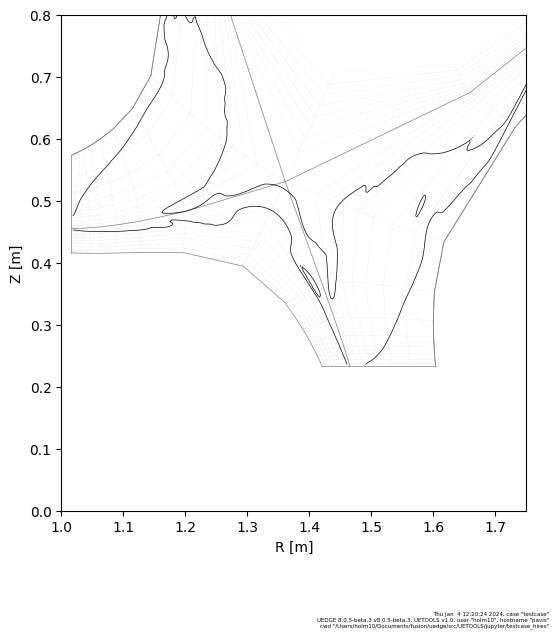

In [9]:
c.contour(c.get('te')/c.get('ev'), levels=[10,50], labels=False, xlim=(1, 1.75), ylim=(0,0.8));